<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.06/bds_espacial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/geopandas_logo_big.png?raw=true" width="280">
</p>

 # **<font color="DeepPink">Datos Espaciales</font>**

 ## **<font color="DeepPink">Instalación de bibliotecas</font>**

Para algunos mapas que vamos a realizar necesitamos instalar bibliotecas que no vienen por defecto en colab.

In [1]:
! pip install folium
! pip install mapclassify
! pip install geodatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 680.1 kB/s eta 0:00:00


In [2]:
%reload_ext autoreload
%autoreload 2

 ## **<font color="DeepPink">Mapas con GeoPandas</font>**

<p align="justify">
Una de las principales herramientas para el Data Science geográfico es la confección de mapas para poder visualizar patrones en ellos. GeoPandas ofrece funciones que facilitan bastante la confección de ellos, algo ya estuvimos explorando con el método <code>plot()</code> en el colab anterior.
<br><br>
En este colab estudiaremos como realizar mapas más complejos que incluyan mayor información que nos permita ir visualizando los patrones que buscamos.

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

<p align="justify">
Vamos a trabajar con los datos brindados por el INDEC referidos al censo 2022 que se realizó en Argentina.
<br><br>
A menudo las bases de datos pueden ser muy grandes y puede que se descargen en formato zip para reducir el tamaño de almacenamiento. Python, a través de la biblioteca <code>zipfile</code>, permite descomprimir los archivos directamente y poder leerlos desde nuestro código.

In [4]:
import requests
import zipfile

url = "https://raw.githubusercontent.com/pabanib/dataframes/master/censo/departamentos.zip"

try:
    respuesta1 = requests.get(url, stream=True)
    respuesta1.raise_for_status()
    with open("departamentos.zip", "wb") as archivo_zip1:
        for chunk in respuesta1.iter_content(chunk_size=8192):
            archivo_zip1.write(chunk)
    with zipfile.ZipFile("departamentos.zip", 'r') as zip_ref:
        zip_ref.extractall('/content/')  # Replace '/content/' with the folder where you want to extract the files
    print("Archivo ZIP descomprimido correctamente.")
except requests.exceptions.RequestException as e:
    print("Error al descargar o descomprimir el archivo ZIP:", e)
except zipfile.BadZipFile as e:
    print("El archivo no es un archivo ZIP válido:", e)
except Exception as e:
    print("Otro error ocurrió:", e)


Archivo ZIP descomprimido correctamente.


<p align="justify">
Los archivos georeferenciados del censo son 4 que conforman diferentes niveles de detalle. Se puede descargar por provincias, departamentos, localidades o radios censales. Trabajaremos por ahora con los datos de los departamentos.
<br><br>
Además de tener los polígonos de cada uno de los departamentos de Argentina, la base de datos contiene la cantidad de viviendas que hay en la región y sus diferentes tipos. La descripción de cada campo se puede ver en la documentación del siguiente enlace: <a href="https://precensodeviviendas.indec.gob.ar/docs/diccionario_base_precenso_viviendas.pdf">https://precensodeviviendas.indec.gob.ar/docs/diccionario_base_precenso_viviendas.pdf</a>  
<br><br>
Algunos de los campos significan:
<br><br><ul align="justify">
<li>ind01: Cantidad de viviendas en la región.
<br><br>
<li>ind05: Cantidad de casas expresadas como cociente entre casas y el total de viviendas particulares.
<br><br>
<li>ind06: Cantidad de departamentos expresados como el cociente entre departamentos y el total de viviendas particulares.
<br><br>
<li>ind07: Cantidad de departamentos en edificios de altura  expresado como el cociente entre este tipo de departamento y el total de viviendas tipo departamento.


In [5]:
#levantamos el archivo shape-file
#radios = gpd.read_file("radiosPolygon.shp")
#loca = gpd.read_file("localidadesPolygon.shp")
depas = gpd.read_file("departamentosPolygon.shp")

#cambiamos los nombres de las columnas de indicadores para hacerlo más entendible
columnas = {"ind01":"viviendas", "ind05": "casas", "ind06":"dptos1", "ind07": "dptos2"}
depas = depas.rename(columns = columnas)
depas.head()

id  old_id          area    perimeter prov depto    nomdepto   link  \
0   1       1  7.687759e+09  1327967.403   94   015     Ushuaia  94015   
1   2       1  6.442354e+09   451601.571   94   011     Tolhuin  94011   
2   3       1  6.567792e+09   599296.017   94   008  Río Grande  94008   
3   4       1  3.365015e+10  1112109.938   78   021   Güer Aike  78021   
4   5       1  2.032299e+10   753232.634   78   042  Magallanes  78042   

  viviendas ind03  ... ind08 ind09 ind10 ind11 ind12 ind13 ind14 ind15  \
0     30656  99.7  ...   0.0   5.6   0.1   0.6   0.0   0.1   0.4   5.1   
1      2574  98.6  ...   2.7   0.0   0.0   1.7   0.2   0.4   0.4  15.1   
2     36493  99.9  ...   0.0   0.0   0.2   1.7   0.0   0.2   0.3   0.3   
3     52198  99.9  ...   0.0   0.0   0.5   4.5   0.0   0.1   0.5   3.3   
4      4770  99.6  ...   0.0   0.0   0.0   4.3   0.0   0.2   0.4   4.2   

                                             nomprov  \
0  Tierra del Fuego, Antártida e Islas del Atlánt...   
1  Tierra del Fuego, Antártida e Islas del Atlánt...   
2  Tierra del Fuego, Antártida e Islas del Atlánt...   
3                                         Santa Cruz   
4                                         Santa Cruz   

                                            geometry  
0  MULTIPOLYGON (((-68.57394 -54.42581, -68.56367...  
1  POLYGON ((-66.94900 -54.18849, -66.94897 -54.1...  
2  POLYGON ((-68.56935 -52.70694, -68.56996 -52.7...  
3  MULTIPOLYGON (((-71.50027 -50.71167, -71.20694...  
4  MULTIPOLYGON (((-67.24351 -48.41474, -67.17193...  

[5 rows x 24 columns]

In [6]:
depas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         529 non-null    int64   
 1   old_id     529 non-null    int64   
 2   area       529 non-null    float64 
 3   perimeter  529 non-null    float64 
 4   prov       529 non-null    object  
 5   depto      529 non-null    object  
 6   nomdepto   529 non-null    object  
 7   link       529 non-null    object  
 8   viviendas  476 non-null    object  
 9   ind03      476 non-null    object  
 10  ind04      476 non-null    object  
 11  casas      476 non-null    object  
 12  dptos1     476 non-null    object  
 13  dptos2     476 non-null    object  
 14  ind08      476 non-null    object  
 15  ind09      476 non-null    object  
 16  ind10      476 non-null    object  
 17  ind11      476 non-null    object  
 18  ind12      476 non-null    object  
 19  ind13      476 non-nu

<p align="justify">
Al consultar la información del DataFrame podemos ver que tenemos las variables numéricas clasificadas como object, por lo tanto no van a ser consideradas correctamente a la hora de hacer cálculos.
<br><br>
Procedemos a transformarlas en numéricas, así nos quedan de la manera correcta.



In [7]:
def numerica(variable):
   #intenta convertir la serie a float
  try:
   variable = variable.astype(float)
  except:
   pass
  return variable

depas = depas.apply(numerica, axis = 0)
depas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         529 non-null    float64 
 1   old_id     529 non-null    float64 
 2   area       529 non-null    float64 
 3   perimeter  529 non-null    float64 
 4   prov       529 non-null    float64 
 5   depto      529 non-null    float64 
 6   nomdepto   529 non-null    object  
 7   link       529 non-null    float64 
 8   viviendas  476 non-null    float64 
 9   ind03      476 non-null    float64 
 10  ind04      476 non-null    float64 
 11  casas      476 non-null    float64 
 12  dptos1     476 non-null    float64 
 13  dptos2     476 non-null    float64 
 14  ind08      476 non-null    float64 
 15  ind09      476 non-null    float64 
 16  ind10      476 non-null    float64 
 17  ind11      476 non-null    float64 
 18  ind12      476 non-null    float64 
 19  ind13      476 non-nu

<p align="justify">
Consultamos cual es el CRS de los datos que tenemos para saber, bajo que proyección estamos trabajando y si va ser la que nosotros deseamos.

In [8]:
depas.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Para realizar un mapa simple con GeoPandas solo basta con utilizar el método <code>GeoDataFrame.plot()</code> como ya vimos en el colab anterior.

<Axes: >

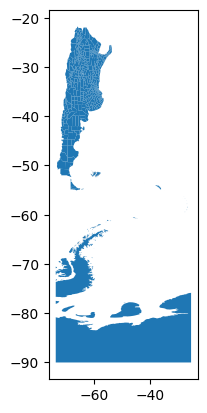

In [9]:
depas.plot()

Probemos como se ve el mapa reproyectando los datos al CRS Posgar 98 que es el que habitualmente se utiliza para Argentina.

<Axes: >

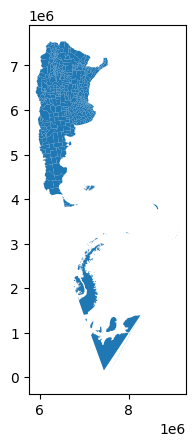

In [10]:
depas = depas.to_crs(epsg = 22177)
depas.plot()


<p align="justify">
Se nota un claro cambio en la forma del mapa con la nueva proyección. Además, ahora los polígonos se encuentran expresados en metros.
<br><br>
Para mejorar la visualización eliminemos la Antártida. Para esto enecesitamos recurrir a la manipulación del DataFrame. Cómo ya dijismos el <code>GeoDataFrame</code> es una subclase de <code>pandas.DataFrame</code> por lo tanto adopta todas las funciones de este. Para encontrar lo que buscamos podemos usar <code>gdf.query</code> o en este caso como no sabemos bien como está escrito vamos a buscar la palbra "Antártida" e "Islas" en cada uno de los nombre usando el método <code>apply</code>.

<Axes: >

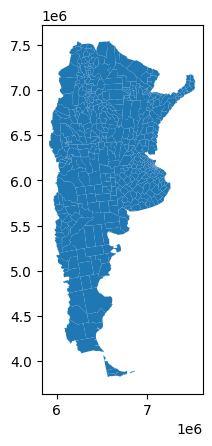

In [11]:
# Usamos apply para buscar las palabras deseadas en cada uno de los nombres
encuentra = depas.nomdepto.apply(lambda x: 'Antártida' in x or 'Islas' in x)
#La función anterior me va devolver True cuando encuentre la palabra como queremos eliminar, lo damos vuelta
depas = depas[encuentra == False]
depas.plot()


 ## **<font color="DeepPink">Mapas de coropletas</font>**

<p align="justify">
Un mapa de coropletas es un tipo de representación cartográfica que se utiliza para visualizar datos estadísticos agregados en áreas geográficas, como regiones, estados, países o cualquier otra división geográfica. La característica distintiva de un mapa de coropletas es que las áreas geográficas se sombrean o se llenan con colores o patrones diferentes para representar variaciones en los datos estadísticos.
<br><br>
La idea detrás de un mapa de coropletas es resaltar patrones o diferencias en los datos estadísticos en función de la ubicación geográfica. Cada área geográfica se colorea o se sombrea en proporción a un valor específico del atributo estadístico que se está visualizando. Por ejemplo, si estás visualizando la densidad de población de diferentes estados, los estados con una densidad de población más alta se representarían con colores más oscuros o patrones más intensos, mientras que los estados con una densidad de población más baja se representarían con colores más claros o patrones más suaves.
<br><br>
La forma de realizarlo en GeoPandas es muy sencilla ya que simplemente le agregamos el nombre de la columna que queremos reflejar en el parámetro <code>column</code>.

<Axes: >

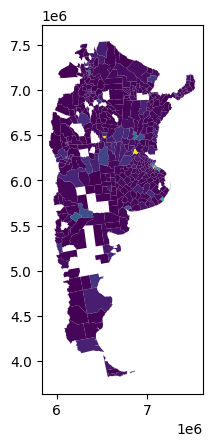

In [12]:
depas.plot(column = 'viviendas')

<p align="justify">
El mapa anterior se ve muy pequeño y además no entendemos que significan los colores. Para poder agrandar el mapa se puede pasar el parámetro de matplotlib <code>figsize</code>. Para saber las escalas vamos a agregar la leyenda mediante <code>legend</code>.

<Axes: >

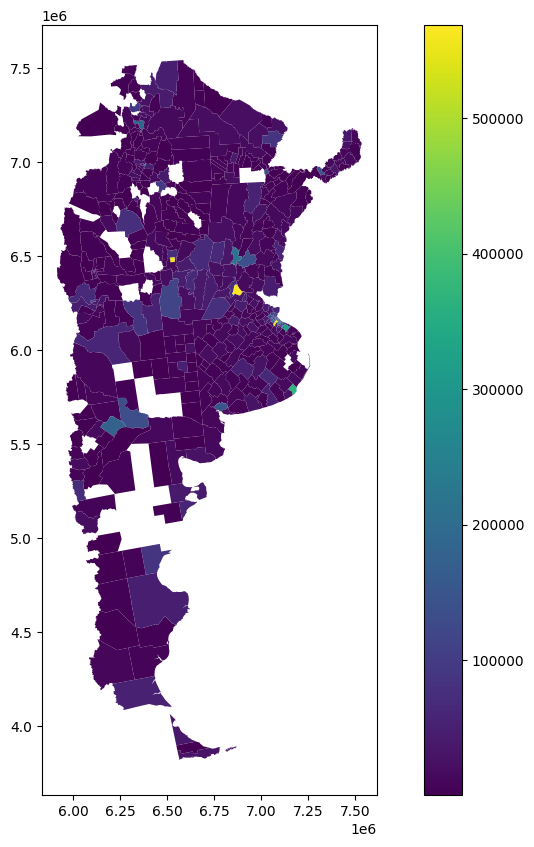

In [13]:
depas.plot(column = 'viviendas', figsize = (12,10), legend = True)

<p align="justify">
Este mapa tiene un problema de datos faltantes y pareciera ser que la Argentina tiene huecos en su territorio. Este mapa no es del todo presentable.
<br><br>
Para solucionar ese tipo de problemas podemos utilizar el parámetro <code>missing_kwds</code> que nos permite contemplar estos valores faltantes.

<Axes: >

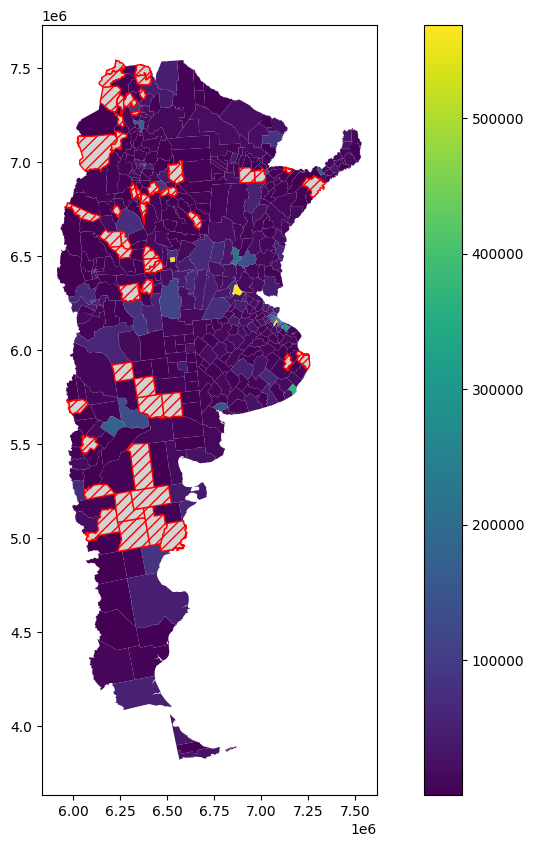

In [14]:
depas.plot(column = 'viviendas', figsize = (12,10), legend = True
           , missing_kwds = {'color': 'lightgrey',
                             'edgecolor': 'red',
                             'hatch': '///',
                             'label': 'Valores nulos'}

           )

<p align="justify">
Podemos cambiar la escala de colores del mapa con <code>cmap</code>. Puede consultar los distintos mapas de colores en este enlace: <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">https://matplotlib.org/stable/tutorials/colors/colormaps.html</a>



<Axes: >

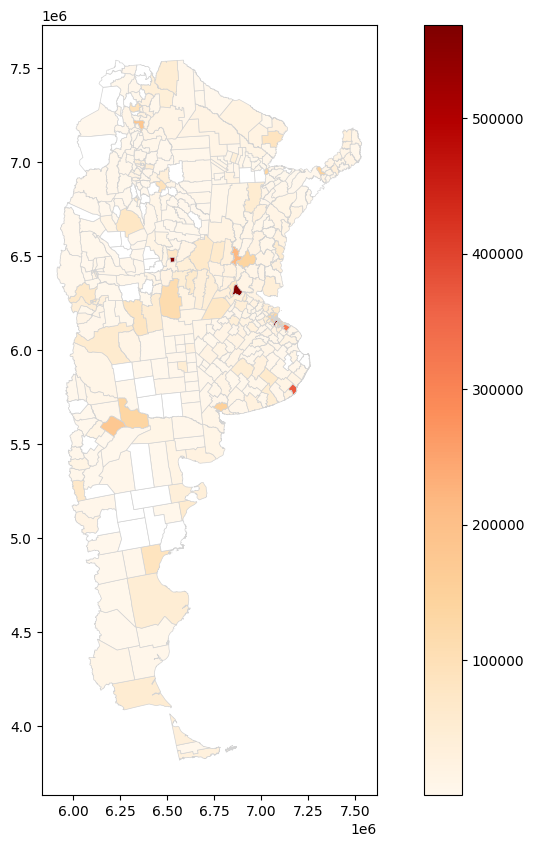

In [28]:
depas.plot(column = 'viviendas', figsize = (12,10), legend = True
           , cmap = 'OrRd'
           , edgecolor = 'lightgray'                                            # Cambiamos el color de las líneas divisoras
           , lw = 0.5                                                           # Cambiamos el grosor de las líneas divisoras
           , missing_kwds = {'color': 'white',
                             'label': 'Valores nulos'}

           )

También podemos tomar un gráfico de cuantiles

<Axes: >

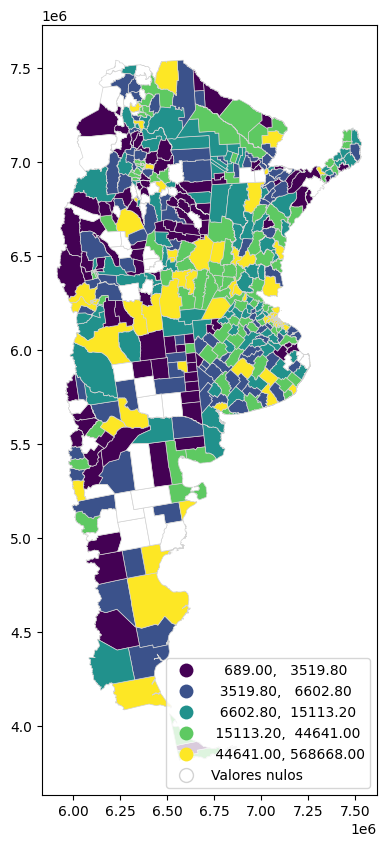

In [29]:
depas.plot(column = 'viviendas', figsize = (12,10), legend = True
           , cmap = 'viridis'
           , edgecolor = 'lightgray'                                            # Cambiamos el color de las líneas divisoras
           , lw = 0.5                                                           # Cambiamos el grosor de las líneas divisoras
           , missing_kwds = {'color': 'white',
                             'label': 'Valores nulos'}
           , scheme = "quantiles"
           , legend_kwds = {'loc': 'lower right'}                               # Se pasan parámetros del cuadro de leyenda, en este caso modificamos la ubicación

           )

<Axes: >

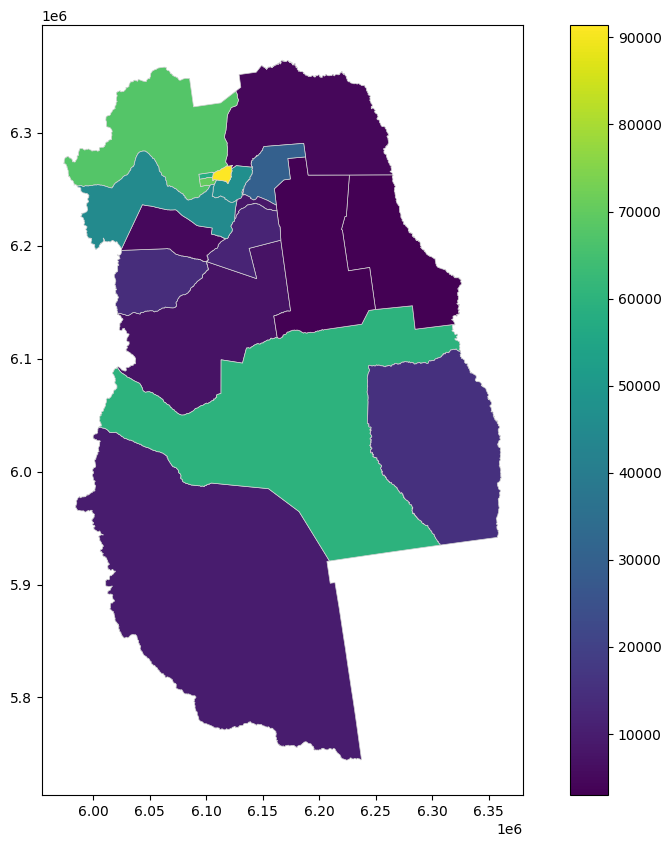

In [30]:
depas.query('nomprov == "Mendoza"').plot(column = 'viviendas', figsize = (12,10), legend = True
           , cmap = 'viridis'
           , edgecolor = 'lightgray'                                            # Cambiamos el color de las líneas divisoras
           , lw = 0.5                                                           # Cambiamos el grosor de las líneas divisoras
           , missing_kwds = {'color': 'white',
                             'label': 'Valores nulos'}
           #, scheme = "quantiles"
           #, legend_kwds = {'loc': 'lower right'}                              # Se pasan parámetros del cuadro de leyenda, en este caso modificamos la ubicación

           )

In [18]:
sum(depas.casas > 85)/depas.casas.count()

0.4926315789473684

 ## **<font color="DeepPink">Mapas con capas</font>**

<p align="justify">
Una de las caraceterísticas de los mapas es que se le pueden ir agregando capas de información. Para realizar esto con GeoPandas tenemos dos opciones, una más corta y otra que es un poco más flexible.
<br><br>
Supongamos que queremos destacar aquellos departamentos en el que más del 85% de viviendas son de tipo casas. Para esto queremos ver todo el mapa y señalar los departamentos que cumplen nuestro requisito.

<Axes: >

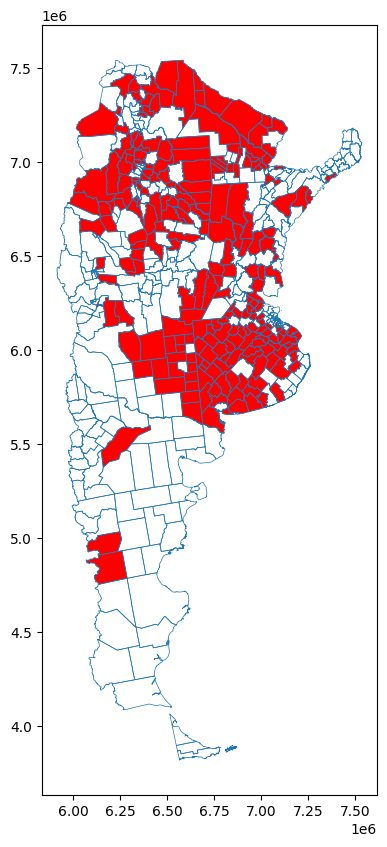

In [31]:
# Seleccionamos los datos que cumplen con nuestro requisito
depas_casas = depas[depas.casas > 85]

# Método 1. Generamos el objeto axis de matplotlib llamando la función gdf.plot()

ax = depas.boundary.plot(figsize = (12,10),lw = 0.5)                            # boundary perimte graficar solo el perímetro de esta manera nos genera un mapa hueco

depas_casas.plot(ax = ax                                                        # de esta forma le decimos que queremos los gráficos superpuestos
                 , color = 'red')


<Axes: >

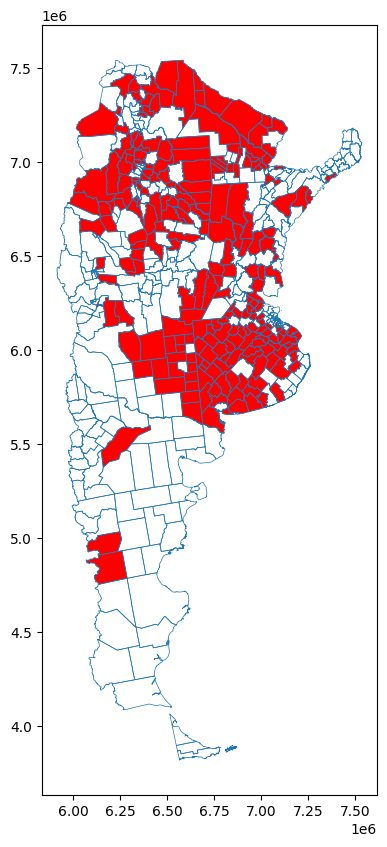

In [34]:
# Método 2. Llamando la función subplots de matplotlib

fig, ax = plt.subplots( figsize = (12,10))

depas.boundary.plot(ax = ax, lw = 0.5)

depas_casas.plot(ax =ax # de esta forma le decimos que queremos los gráficos superpuestos
                 , color = 'red')

Ahora supongamos que en vez de ver el departamento todo pintado queremos ver los puntos de cada uno de estos departamentos.

<Axes: >

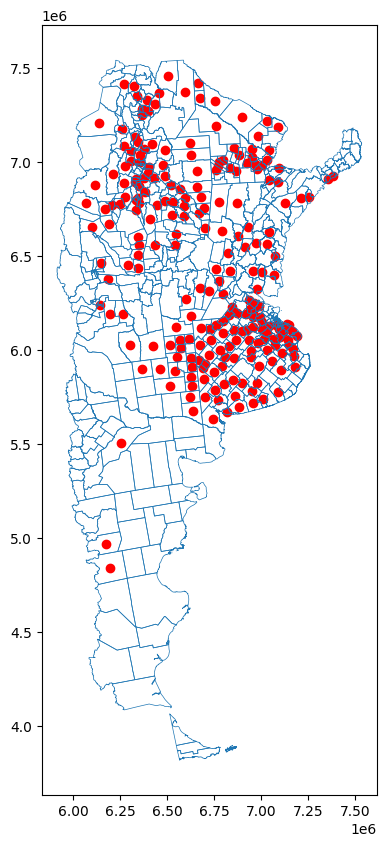

In [35]:
fig, ax = plt.subplots( figsize = (12,10))

depas.boundary.plot(ax = ax, lw = 0.5)

depas_casas.geometry.centroid.plot(ax =ax ,color = 'red')

<p align="justify">
Supongamos que queremos trazar un trayecto entre diferentes ciudades de Argentina. Para eso necesitamos crear un objeto line de <code>shapely</code> que conenecte los centroides de las ciudades deseadas.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

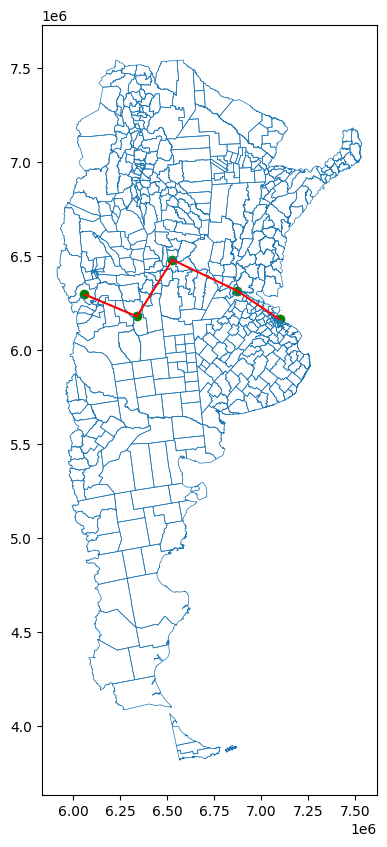

In [36]:
# Filtramos las ciudades
ciudades = [50049,74056, 14014,82084,2007]
orden = [2,1,3,4,5]
ciud = depas[depas.link.apply(lambda x:x in ciudades)]
ciud.loc[:,'orden'] = orden
ciud = ciud.sort_values('orden')

# Generamos la línea con shapely
import shapely as sh
recorrido = sh.geometry.linestring.LineString(ciud.geometry.centroid)
recorrido = gpd.GeoSeries(recorrido)

# Realizamos el gráfico
ax = depas.boundary.plot(figsize = (12,10), lw = 0.5)
ciud.geometry.centroid.plot(ax = ax, color = 'green')
recorrido.plot(ax = ax, color = 'red')

 ## **<font color="DeepPink">Mapas interactivos</font>**

<p align="justify">
Además de los mapas estáticos y todas las opciones que hemos visto, GeoPandas permite elaborar mapas interactivos utilizando la biblioteca <code>folium</code>. Esto se hace con el método <code>gpd.explore()</code> que permite ubicar las geografías en un mapa proporcionado por OpenStreetMap.

In [23]:
depas.columns

Index(['id', 'old_id', 'area', 'perimeter', 'prov', 'depto', 'nomdepto',
       'link', 'viviendas', 'ind03', 'ind04', 'casas', 'dptos1', 'dptos2',
       'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15',
       'nomprov', 'geometry'],
      dtype='object')

In [24]:
mendo = depas.query('nomprov == "Mendoza"')#[['nomdepto','area', 'viviendas','geometry']]
#mendo.explore()

Se puede realizar el mapa de coropletas, pero ahora en un mapa interactivo.

In [37]:
mendo.explore(
    column = 'viviendas',                                                       # Realiza el mapa de coropletas.
    tooltip = 'viviendas',                                                      # Muestra la variable viviendas sobre el mapa.
    popup = True,                                                               # Muestra todos los valores cuando hacemos clic.
    cmap = "viridis",
    style_kwds=dict(color="black")                                              # Colocar las líneas de otro color.
)

<p align="justify">
El método <code>explode()</code> devuelve un objeto folium.map, que también se puede pasar directamente (como lo hace con AX en <code>plot()</code>). Luego puede usar la funcionalidad del folio directamente en el mapa resultante. En el siguiente ejemplo, puede trazar dos GeoDataFrames en el mismo mapa y agregar control de capa usando el folium. También puede agregar mosaicos adicionales que le permiten cambiar el fondo directamente en el mapa.

In [26]:
import geodatasets
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries")).explode(ignore_index=True)

Extracting 'chicago_commpop/chicago_commpop.geojson' from '/root/.cache/geodatasets/chicago_commpop.zip' to '/root/.cache/geodatasets/chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'
Extracting 'grocery/chicago_sup.prj' from '/root/.cache/geodatasets/grocery.zip' to '/root/.cache/geodatasets/grocery.zip.unzip'


In [27]:
import folium

# Crear un objeto de mapa con el nombre "m" y explorar los datos de Chicago
m = chicago.explore(
    column="POP2010",                                                           # crear un mapa de coropleta basado en la columna "POP2010"
    scheme="naturalbreaks",                                                     # utilizar el esquema de "natural breaks" de mapclassify
    legend=True,                                                                # mostrar la leyenda
    k=10,                                                                       # utilizar 10 bins (clases)
    tooltip=False,                                                              # ocultar el tooltip (información emergente)
    popup=["POP2010", "POP2000"],                                               # mostrar popup (al hacer clic) con las columnas "POP2010" y "POP2000"
    legend_kwds=dict(colorbar=False),                                           # no utilizar la barra de colores en la leyenda
    name="chicago",                                                             # nombre de la capa en el mapa
)

# Explorar los datos de la capa "groceries" en el mapa "m"
groceries.explore(
    m=m,                                                                        # pasar el objeto de mapa "m"
    color="red",                                                                # utilizar el color rojo en todos los puntos
    marker_kwds=dict(radius=5, fill=True),                                      # hacer el radio del marcador 10px y con relleno
    tooltip="Address",                                                          # mostrar la columna "Address" en el tooltip
    tooltip_kwds=dict(labels=False),                                            # no mostrar etiquetas de columna en el tooltip
    name="groceries",                                                           # nombre de la capa en el mapa
)

# Agregar una capa de "Stamen Toner" como alternativa de visualización de mapas
folium.TileLayer("Stamen Toner", show=False).add_to(m)

# Agregar control de capas al mapa
folium.LayerControl().add_to(m)
m

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:<br><br>
✅ Utilizamos la librería GeoPandas para hacer mapas simples. <br>
✅ Elaboramos mapas de coropletas y de cuantiles. <br>
✅ Trabajamos con diferentes capas para visualizar un mapa. <br>
✅ Hicimos mapas dinámicos con la librería folium. <br>

<p align="justify">



<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
